# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
titanic_df = pd.read_csv("titanic.csv")

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
titanic_df.head(8)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [10]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [13]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
titanic_df.drop(titanic_df[titanic_df['Embarked'].isna()].index,axis=0,inplace=True)

In [15]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

for the servival we can understand that PassengerId, Name and Ticket is nothing to do servival to drop it

In [16]:
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [17]:
titanic_dfcor=titanic_df.corr()
titanic_dfcor

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.335549 -0.074673 -0.034040  0.083151  0.255290
Pclass   -0.335549  1.000000 -0.327954  0.081656  0.016824 -0.548193
Age      -0.074673 -0.327954  1.000000 -0.231875 -0.178232  0.088604
SibSp    -0.034040  0.081656 -0.231875  1.000000  0.414542  0.160887
Parch     0.083151  0.016824 -0.178232  0.414542  1.000000  0.217532
Fare      0.255290 -0.548193  0.088604  0.160887  0.217532  1.000000

In [18]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<AxesSubplot:>

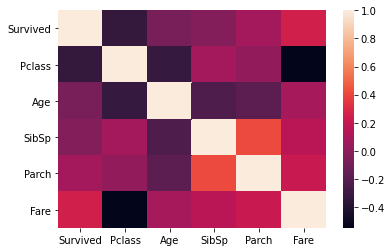

In [20]:
sns.heatmap(titanic_dfcor)

<AxesSubplot:>

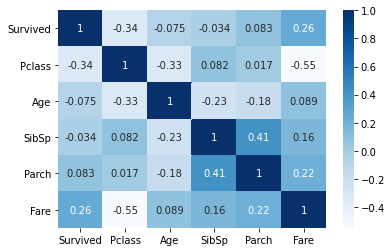

In [21]:
plt.figure(figsize=(6,4)) 
sns.heatmap(titanic_dfcor,cmap='Blues',annot=True)

In [22]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
titanic_df.shape

(889, 8)

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
SibSp       AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Parch             AxesSubplot(0.125,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

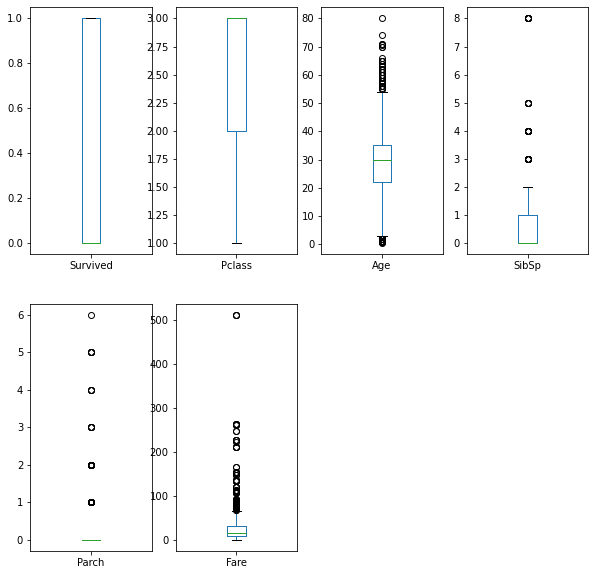

In [24]:
titanic_df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

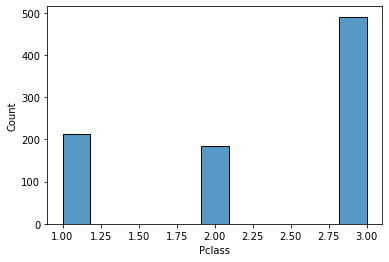

In [25]:
sns.histplot(titanic_df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

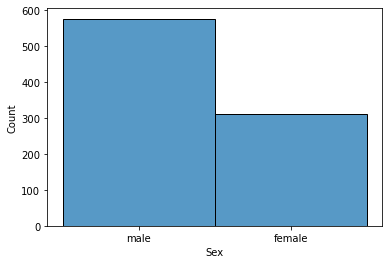

In [26]:
sns.histplot(titanic_df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

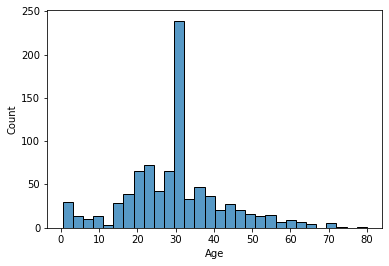

In [27]:
sns.histplot(titanic_df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

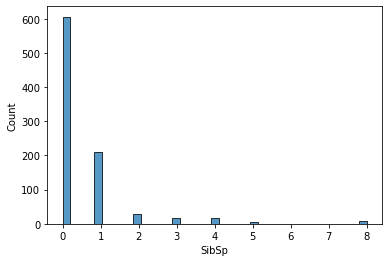

In [28]:
sns.histplot(titanic_df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

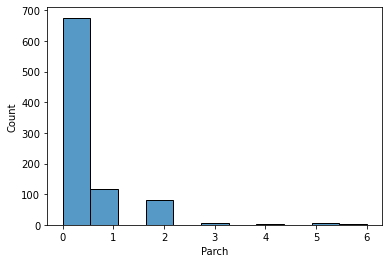

In [29]:
sns.histplot(titanic_df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

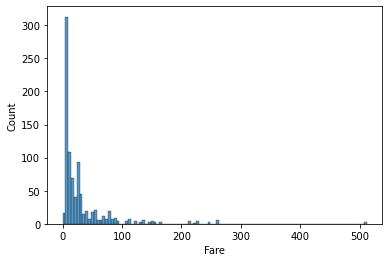

In [30]:
sns.histplot(titanic_df['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

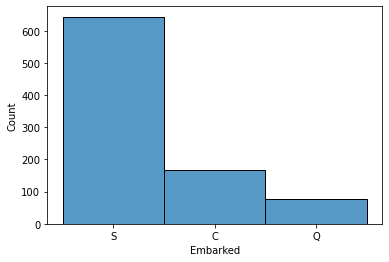

In [31]:
sns.histplot(titanic_df['Embarked'])

<AxesSubplot:xlabel='Survived', ylabel='Count'>

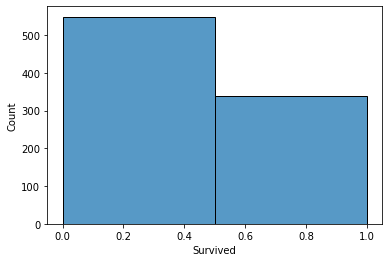

In [32]:
sns.histplot(titanic_df['Survived'],bins=2)


We can see from insignt that Less people servirced then died and there are larage no of Males was there than male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

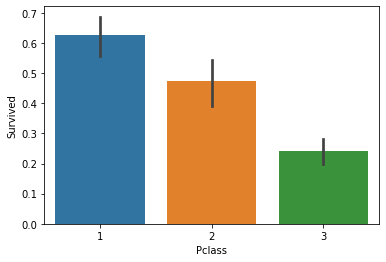

In [33]:
sns.barplot(titanic_df['Pclass'],titanic_df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

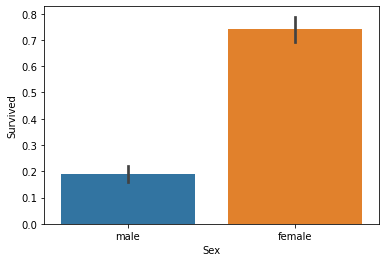

In [34]:
sns.barplot(titanic_df['Sex'],titanic_df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

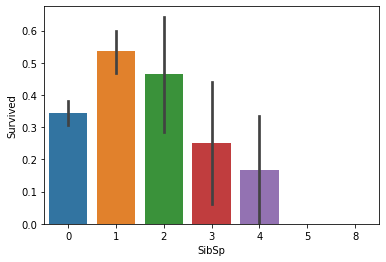

In [35]:
sns.barplot(titanic_df['SibSp'],titanic_df['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

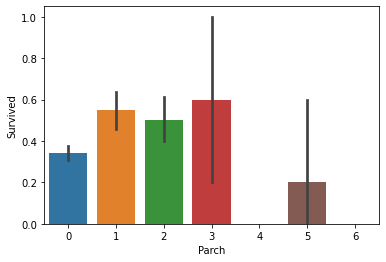

In [36]:
sns.barplot(titanic_df['Parch'],titanic_df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

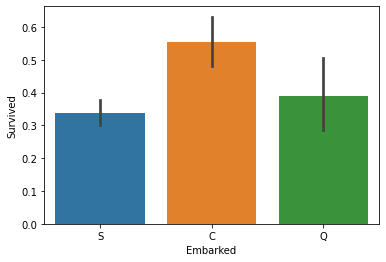

In [37]:
sns.barplot(titanic_df['Embarked'],titanic_df['Survived'])


From the insight we can understand that
More pepole survived with higher class Like 1st has hightest servival
Female were survived more than the male

In [38]:
titanic_df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [39]:
#Performing lable encoder
titanic_df=titanic_df.apply(LabelEncoder().fit_transform)
titanic_df

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       2    1   28      1      0    18         2
1           1       0    0   52      1      0   207         0
2           1       2    0   34      0      0    41         2
3           1       0    0   48      1      0   189         2
4           0       2    1   48      0      0    43         2
..        ...     ...  ...  ...    ...    ...   ...       ...
886         0       1    1   35      0      0    85         2
887         1       0    0   24      0      0   153         2
888         0       2    0   39      1      2   131         2
889         1       0    1   34      0      0   153         0
890         0       2    1   43      0      0    30         1

[889 rows x 8 columns]

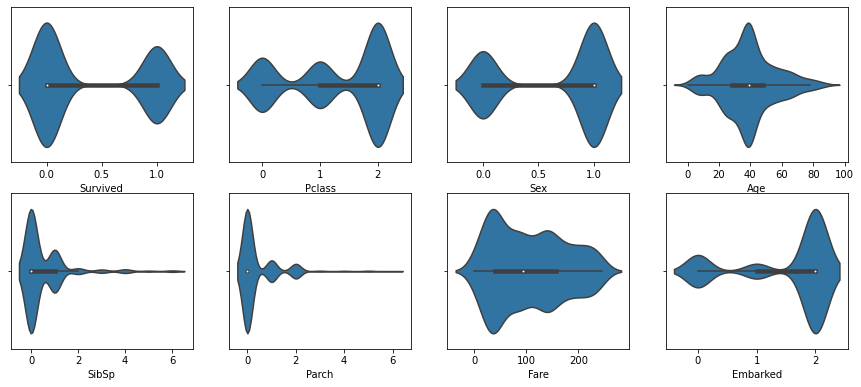

In [40]:
plt.figure(figsize=[15,20])
for i ,column in enumerate(titanic_df.columns):
    plt.subplot(6,4,i+1)
    sns.violinplot(titanic_df[column])

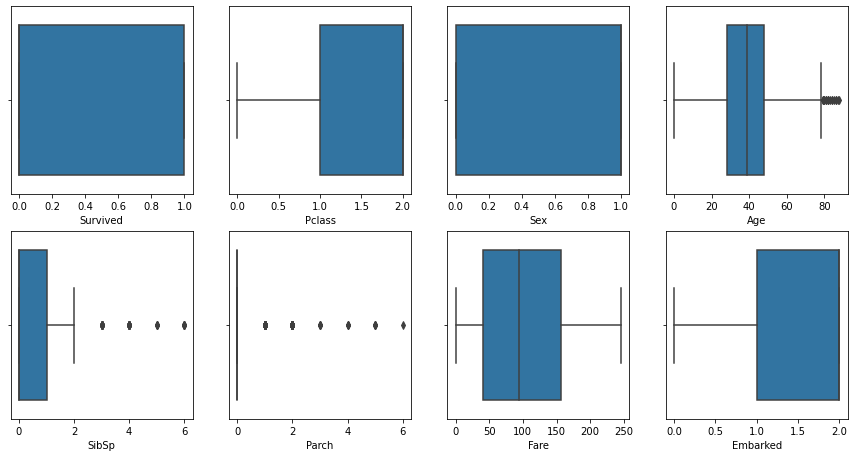

In [41]:
plt.figure(figsize=[15,20])
for i , column in enumerate(titanic_df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(titanic_df[column])

We can see Age, SibSp and Parch column have the outliers so removing it

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(titanic_df))
z

array([[0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 1.24731347,
        0.58683958],
       [1.27071078, 1.57221121, 1.35991138, ..., 0.47432585, 1.46177206,
        1.93955453],
       [1.27071078, 0.82520863, 1.35991138, ..., 0.47432585, 0.91763639,
        0.58683958],
       ...,
       [0.78696114, 0.82520863, 1.35991138, ..., 2.00611934, 0.37240433,
        0.58683958],
       [1.27071078, 1.57221121, 0.73534203, ..., 0.47432585, 0.68774762,
        1.93955453],
       [0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 1.07530804,
        0.67635748]])

In [43]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  50,  59,  67,  70,  85, 118, 158, 163, 166, 170,
       179, 181, 200, 232, 260, 265, 277, 323, 359, 385, 436, 437, 479,
       540, 541, 566, 609, 637, 677, 682, 685, 735, 773, 786, 791, 812,
       823, 844, 848, 856, 861, 883], dtype=int64), array([5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 4,
       5], dtype=int64))


In [44]:
titanic_df

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       2    1   28      1      0    18         2
1           1       0    0   52      1      0   207         0
2           1       2    0   34      0      0    41         2
3           1       0    0   48      1      0   189         2
4           0       2    1   48      0      0    43         2
..        ...     ...  ...  ...    ...    ...   ...       ...
886         0       1    1   35      0      0    85         2
887         1       0    0   24      0      0   153         2
888         0       2    0   39      1      2   131         2
889         1       0    1   34      0      0   153         0
890         0       2    1   43      0      0    30         1

[889 rows x 8 columns]

In [45]:
titanic_df=titanic_df.drop(np.where(z>3)[0],axis=0)

In [46]:
titanic_df['Survived'].value_counts()

0    517
1    327
Name: Survived, dtype: int64

Splitting Variable

In [47]:
X = titanic_df.drop('Survived',axis=1)


In [48]:
y = titanic_df['Survived']

Checking VIF

In [49]:
titanic_df_info = pd.DataFrame()
titanic_df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
titanic_df_info['Columns'] = X.columns
titanic_df_info.sort_values('VIF',ascending=False)

VIF   Columns
2  6.239513       Age
5  5.195383      Fare
6  4.477655  Embarked
0  3.906004    Pclass
1  3.043248       Sex
3  1.940377     SibSp
4  1.753625     Parch

Checking for Skewness

In [50]:
titanic_df.skew()

Survived    0.462922
Pclass     -0.628094
Sex        -0.621357
Age         0.345606
SibSp       3.020864
Parch       2.722012
Fare        0.371024
Embarked   -1.223312
dtype: float64

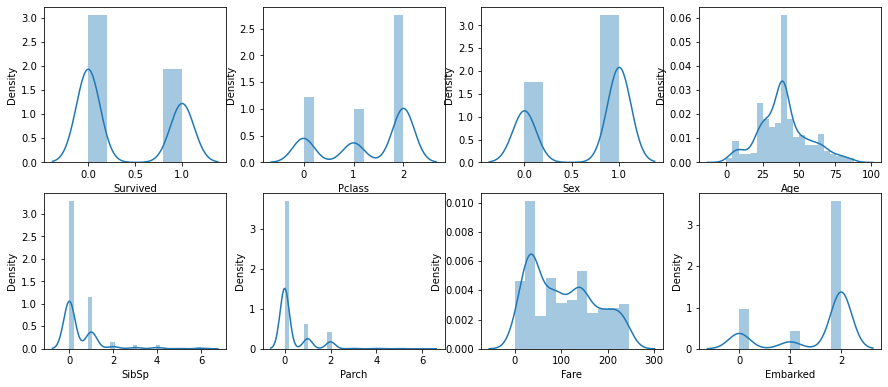

In [51]:
plt.figure(figsize=[15,20])
for i , column in enumerate(titanic_df.columns):
    plt.subplot(6,4,i+1)
    sns.distplot(titanic_df[column])

In [52]:
X_transformted = PowerTransformer().fit_transform(X)

In [53]:
X = pd.DataFrame(X_transformted,columns=X.columns)
X

Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0    0.853366  0.736859 -0.647682  1.377150 -0.547968 -1.422434  0.620601
1   -1.479116 -1.357111  0.769364  1.377150 -0.547968  1.307506 -1.756080
2    0.853366 -1.357111 -0.275265 -0.681793 -0.547968 -0.845127  0.620601
3   -1.479116 -1.357111  0.544900  1.377150 -0.547968  1.134855  0.620601
4    0.853366  0.736859  0.544900 -0.681793 -0.547968 -0.803680  0.620601
..        ...       ...       ...       ...       ...       ...       ...
839 -0.537668  0.736859 -0.214593 -0.681793 -0.547968 -0.086915  0.620601
840 -1.479116 -1.357111 -0.905189 -0.681793 -0.547968  0.762861  0.620601
841  0.853366 -1.357111  0.024589  1.377150  1.879769  0.513567  0.620601
842 -1.479116  0.736859 -0.275265 -0.681793 -0.547968  0.762861 -1.756080
843  0.853366  0.736859  0.258658 -0.681793 -0.547968 -1.093366 -1.190365

[844 rows x 7 columns]

In [54]:
X.skew()

Pclass     -0.485622
Sex        -0.621357
Age         0.011931
SibSp       0.801076
Parch       1.280767
Fare       -0.162034
Embarked   -1.030387
dtype: float64

Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,shuffle=True)

Creating Model

Logistic Regression

In [56]:
logisticRegression = LogisticRegression()

In [57]:
logisticRegression.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred = logisticRegression.predict(X_test)
y_pred_proba = logisticRegression.predict_proba(X_test)[::,1]

In [59]:
metrics.accuracy_score(y_test,y_pred)

0.7535545023696683

In [60]:
metrics.confusion_matrix(y_test,y_pred)

array([[98, 29],
       [23, 61]], dtype=int64)

In [61]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [62]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
print('auc:',auc)

auc: 0.8316929133858267


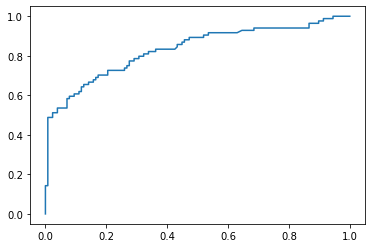

In [63]:
plt.plot(fpr,tpr)

DecisionTreeClassifier

In [64]:
decisionTreeClassifier = DecisionTreeClassifier()

In [65]:
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = decisionTreeClassifier.predict(X_test)
y_pred_proba = decisionTreeClassifier.predict_proba(X_test)[::,1]

In [67]:
metrics.accuracy_score(y_test,y_pred)

0.7772511848341233

In [68]:
metrics.confusion_matrix(y_test,y_pred)

array([[100,  27],
       [ 20,  64]], dtype=int64)

In [69]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [70]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.7765279340082489

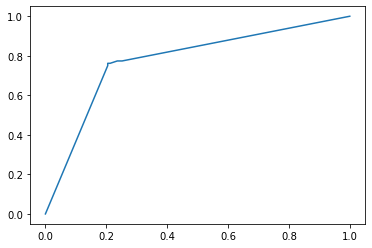

In [71]:
plt.plot(fpr,tpr)

# SVN

In [72]:
svc = SVC(probability=True)

In [73]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [74]:
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[::,1]

In [75]:
metrics.accuracy_score(y_test,y_pred)

0.8056872037914692

In [76]:
metrics.confusion_matrix(y_test,y_pred)

array([[116,  11],
       [ 30,  54]], dtype=int64)

In [77]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [78]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.8176321709786276

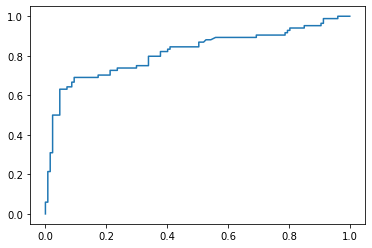

In [79]:
plt.plot(fpr,tpr)

# KNeighborsClassifier

In [80]:
kNeighborsClassifier = KNeighborsClassifier()

In [81]:
kNeighborsClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
y_pred = kNeighborsClassifier.predict(X_test)
y_pred_proba = kNeighborsClassifier.predict_proba(X_test)[::,1]

In [83]:
metrics.accuracy_score(y_test,y_pred)

0.7677725118483413

In [84]:
metrics.roc_auc_score(y_test,y_pred_proba)

0.8343175853018372

In [85]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

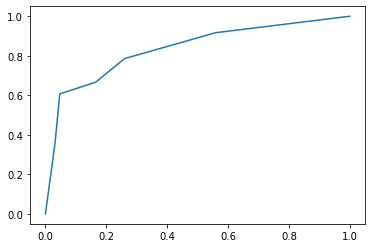

In [86]:
plt.plot(fpr,tpr)

# Cross validation 

In [ ]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    SVC(probability=True,C=1,shrinking=True,kernel='rbf'),
    X,
    y,
    cv=kFold,
    scoring='accuracy',
    n_jobs=100
)

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 555, in run
    result_item, is_broken, bpe = self.wait_result_broken_or_wakeup()
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 609, in wait_result_broken_or_wakeup
    ready = wait(readers + worker_sentinels)
  File "C:\Users\dell\anaconda3\lib\multiprocessing\connection.py", line 879, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "C:\Users\dell\anaconda3\lib\multiprocessing\connection.py", line 811, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 101


In [ ]:
print('scores:',np.mean(scores))
print('scores:',np.std(scores))

scores: 0.8104621848739495
scores: 0.03365299086011907

Conclusion Best model is to use SVC that have 81 % accuracy with std 0.03